In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
# Load the data
data = pd.read_csv('../data/input/test/oneLineOneDayETA.csv')
data

,co,time,route,dir,service_type,seq,dest,eta_seq,eta,rmk,timestamp
0,KMB,2024-09-18-10-33-25,278K,O,1,1,粉嶺站(循環線),1,2024-09-18T10:37:00+08:00,原定班次,2024-09-18T10:33:16+08:00
1,KMB,2024-09-18-10-33-25,278K,O,1,1,粉嶺站(循環線),2,2024-09-18T10:45:00+08:00,原定班次,2024-09-18T10:33:16+08:00
2,KMB,2024-09-18-10-33-25,278K,O,1,1,粉嶺站(循環線),3,2024-09-18T10:52:00+08:00,原定班次,2024-09-18T10:33:16+08:00
3,KMB,2024-09-18-10-33-25,278K,O,1,2,粉嶺站(循環線),1,2024-09-18T10:37:00+08:00,原定班次,2024-09-18T10:33:16+08:00
4,KMB,2024-09-18-10-33-25,278K,O,1,2,粉嶺站(循環線),2,2024-09-18T10:45:00+08:00,原定班次,2024-09-18T10:33:16+08:00
...,...,...,...,...,...,...,...,...,...,...,...
1858,KMB,2024-09-18-17-12-38,278K,O,1,8,粉嶺站(循環線),2,2024-09-18T17:24:43+08:00,原定班次,2024-09-18T17:12:13+08:00
1859,KMB,2024-09-18-17-12-38,278K,O,1,8,粉嶺站(循環線),3,2024-09-18T17:34:43+08:00,原定班次,2024-09-18T17:12:13+08:00
1860,KMB,2024-09-18-17-12-38,278K,O,1,9,粉嶺站(循環線),4,2024-09-18T17:16:42+08:00,NaN,2024-09-18T17:12:13+08:00
1861,KMB,2024-09-18-17-12-38,278K,O,1,9,粉嶺站(循環線),5,2024-09-18T17:26:34+08:00,原定班次,2024-09-18T17:12:13+08:00


In [19]:
abs(data.iloc[0, 8] - data.iloc[1, 8])

Timedelta('0 days 00:08:00')

In [4]:
# Convert the 'eta' col into datetime
data['eta'] = pd.to_datetime(data['eta'])
data

,co,time,route,dir,service_type,seq,dest,eta_seq,eta,rmk,timestamp
0,KMB,2024-09-18-10-33-25,278K,O,1,1,粉嶺站(循環線),1,2024-09-18 10:37:00+08:00,原定班次,2024-09-18T10:33:16+08:00
1,KMB,2024-09-18-10-33-25,278K,O,1,1,粉嶺站(循環線),2,2024-09-18 10:45:00+08:00,原定班次,2024-09-18T10:33:16+08:00
2,KMB,2024-09-18-10-33-25,278K,O,1,1,粉嶺站(循環線),3,2024-09-18 10:52:00+08:00,原定班次,2024-09-18T10:33:16+08:00
3,KMB,2024-09-18-10-33-25,278K,O,1,2,粉嶺站(循環線),1,2024-09-18 10:37:00+08:00,原定班次,2024-09-18T10:33:16+08:00
4,KMB,2024-09-18-10-33-25,278K,O,1,2,粉嶺站(循環線),2,2024-09-18 10:45:00+08:00,原定班次,2024-09-18T10:33:16+08:00
...,...,...,...,...,...,...,...,...,...,...,...
1858,KMB,2024-09-18-17-12-38,278K,O,1,8,粉嶺站(循環線),2,2024-09-18 17:24:43+08:00,原定班次,2024-09-18T17:12:13+08:00
1859,KMB,2024-09-18-17-12-38,278K,O,1,8,粉嶺站(循環線),3,2024-09-18 17:34:43+08:00,原定班次,2024-09-18T17:12:13+08:00
1860,KMB,2024-09-18-17-12-38,278K,O,1,9,粉嶺站(循環線),4,2024-09-18 17:16:42+08:00,NaN,2024-09-18T17:12:13+08:00
1861,KMB,2024-09-18-17-12-38,278K,O,1,9,粉嶺站(循環線),5,2024-09-18 17:26:34+08:00,原定班次,2024-09-18T17:12:13+08:00


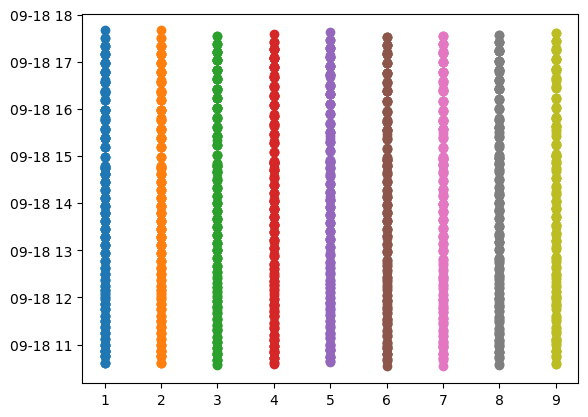

In [6]:
data_by_seq = data.groupby('seq')
# plot the eta scatter of each seq
for name, group in data_by_seq:
    plt.scatter(group['seq'], group['eta'], label=name)

In [17]:
# Filter out the similar datetime records of each seq
data_by_seq.